<a href="https://colab.research.google.com/github/bulnes42/csulb-cecs456-finalProject/blob/main/FinalProject_PreliminaryModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os #Do I need this import files
import time
import tensorflow as tf
from tensorflow import keras
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image



In [ ]:

# add directory information for each class
dataset_folder = "drive/MyDrive/dataset"
abdomenCT_folder = "drive/MyDrive/dataset/AbdomenCT"
breastMRI_folder = "drive/MyDrive/dataset/BreastMRI"
chestCT_folder = "drive/MyDrive/dataset/ChestCT"
cxr_folder = "drive/MyDrive/dataset/CXR"
hand_folder = "drive/MyDrive/dataset/Hand"
headCT_folder = "drive/MyDrive/dataset/HeadCT"

# Create dictionary of classes
classes = {
    'AbdomenCT': 0, 
    'BreastMRI': 1, 
    'ChestCT': 2, 
    'CXR': 3,
    'Hand': 4, 
    'HeadCT': 5
}


In [ ]:
# load images into lists
def load_images_from_folder(folder, label_list, label):
  images = []
  for image in os.listdir(folder):
    images.append(image)
    label_list.append(classes.get(label))
  return images

# Load images into lists and accumulate number of total images
total_images = 0
abdomentCT_labels = []
abdomentCT_images = load_images_from_folder(abdomenCT_folder, abdomentCT_labels, 'AbdomentCT')
total_images += len(abdomentCT_labels)

breastMRI_lables = []
breastMRI_images = load_images_from_folder(breastMRI_folder, breastMRI_lables, 'BreastMRI')
total_images += len(breastMRI_lables)

chestCT_labels = []
chestCT_images = load_images_from_folder(chestCT_folder, chestCT_labels, 'ChestCT')
total_images += len(chestCT_labels)

cxr_labels = []
cxr_images = load_images_from_folder(cxr_folder, cxr_labels, 'CXR')
total_images += len(cxr_labels)

hand_labels = []
hand_images = load_images_from_folder(hand_folder, hand_labels, 'Hand')
total_images += len(hand_labels)

headCT_labels = []
headCT_images = load_images_from_folder(headCT_folder, headCT_labels, 'HeadCT')
total_images += len(headCT_labels)



In [ ]:
# print out the images, labels, and percent for each class to see any skewed data
print("abdomentCT images", len(abdomentCT_images))
print("abdomentCT labels ", len(abdomentCT_labels))
abdomenCT_percent = len(abdomentCT_labels)/total_images

print("abdomentCT percent , " + str(abdomenCT_percent))
print("breastMRI images ", len(breastMRI_images))
print("breastMRI labels ", len(breastMRI_lables))
print("breastMRI percent , " + str((len(breastMRI_lables)/total_images)))
print("chestCT images ", len(chestCT_images))
print("chestCT labels ", len(chestCT_labels))
print("chestCT percent ", (len(chestCT_labels)/total_images))
print("cxr images ", len(cxr_images))
print("cxr labels ", len(cxr_labels))
print("cxr percent ", (len(cxr_labels)/total_images))
print("hand images ",len(hand_images))
print("hand labels ", len(hand_labels))
print("hand percent ", (len(hand_labels)/total_images))
print("headCT images ", len(headCT_images))
print("headCT labels ", len(headCT_labels))
print("headCT percent ", (len(headCT_labels)/total_images))

abdomentCT images 10010
abdomentCT labels  10010
abdomentCT percent , 0.16964951528709918
breastMRI images  8964
breastMRI labels  8964
breastMRI percent , 0.15192190359975594
chestCT images  10010
chestCT labels  10010
chestCT percent  0.16964951528709918
cxr images  10020
cxr labels  10020
cxr percent  0.16981899532235104
hand images  10000
hand labels  10000
hand percent  0.16948003525184732
headCT images  10000
headCT labels  10000
headCT percent  0.16948003525184732


In [ ]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset_folder, labels='inferred', batch_size=64,)
# Define image parameters
IMAGE_HEIGHT=64
IMAGE_WIDTH=64
IMAGE_DIMM=(IMAGE_WIDTH, IMAGE_HEIGHT)
BATCH_SIZE=64
NUM_CLASSES = 6
EPOCHS = 20 # try out a large number then decrease as needed`


Found 59004 files belonging to 6 classes.


['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


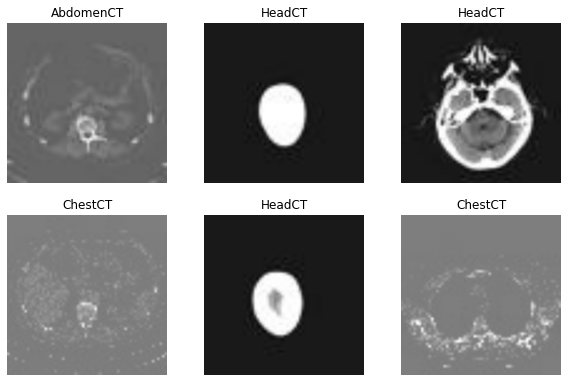

In [ ]:
class_names = dataset.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
dataset.shuffle(58954)
train_size = int(len(dataset)*.7)
validation_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)

In [ ]:
training_dataset = dataset.take(train_size)
validation_dataset = dataset.skip(train_size).take(validation_size)
test_dataset = dataset.skip(train_size + validation_size).take(test_size)

In [ ]:
image = Image.open('drive/MyDrive/dataset/AbdomenCT/000000.jpeg')
print(image.size)
print(image.mode)

(64, 64)
L


In [ ]:
#build a model
preliminary_model = tf.keras.models.Sequential()
preliminary_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[8, 8], activation="relu", padding="same",input_shape=[256, 256, 3]))
preliminary_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
preliminary_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[4, 4], activation="relu", padding="same"))
preliminary_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[4, 4], activation="relu", padding="same"))
preliminary_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
preliminary_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=[4, 4], activation="relu", padding="same"))
preliminary_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=[4, 4], activation="relu", padding="same"))
preliminary_model.add(tf.keras.layers.Flatten())
preliminary_model.add(tf.keras.layers.Dense(units=64, activation="relu"))
preliminary_model.add(tf.keras.layers.Dense(units = 32, activation = "relu"))
preliminary_model.add(tf.keras.layers.Dense(units = 10, activation = "softmax"))
preliminary_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      6176      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      65600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       1

In [ ]:
preliminary_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      6176      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      65600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       1

In [ ]:
preliminary_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
history = preliminary_model.fit(training_dataset, validation_data=validation_dataset, batch_size=256, epochs=20)

Epoch 1/20
645/645 [==============================] - 7058s 11s/step - loss: 1.6616 - accuracy: 0.8422 - val_loss: 0.3268 - val_accuracy: 0.8133
Epoch 2/20
645/645 [==============================] - 358s 554ms/step - loss: 0.8086 - accuracy: 0.7224 - val_loss: 0.3287 - val_accuracy: 0.8178
Epoch 3/20
645/645 [==============================] - 357s 553ms/step - loss: 0.2323 - accuracy: 0.9340 - val_loss: 0.1875 - val_accuracy: 0.9834
Epoch 4/20
645/645 [==============================] - 358s 553ms/step - loss: 0.1996 - accuracy: 0.9620 - val_loss: 0.1288 - val_accuracy: 0.9880
Epoch 5/20
645/645 [==============================] - 358s 555ms/step - loss: 0.0849 - accuracy: 0.9876 - val_loss: 0.0635 - val_accuracy: 0.9911
Epoch 6/20
645/645 [==============================] - 358s 554ms/step - loss: 0.0414 - accuracy: 0.9942 - val_loss: 0.0375 - val_accuracy: 0.9926
Epoch 7/20
645/645 [==============================] - 356s 551ms/step - loss: 0.1259 - accuracy: 0.9561 - val_loss: 0.2007 - 

In [14]:
test_loss, test_accuracy = preliminary_model.evaluate(test_dataset)
print("test loss = ", test_loss)
print("test accuray = ", test_accuracy)

92/92 [==============================] - 789s 8s/step - loss: 0.0319 - accuracy: 0.9949
test loss =  0.031872980296611786
test accuray =  0.9949048757553101


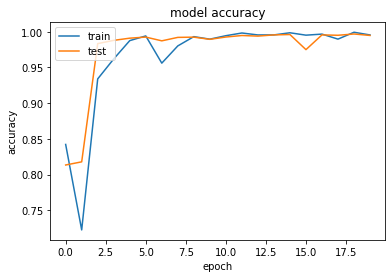

In [15]:
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

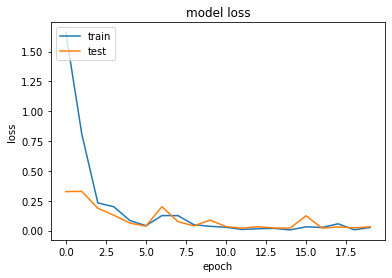

In [16]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()